# <a id='toc1_'></a>[Inaugural Project](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
  - [Members](#toc1_1_)    
- [Imports and set magics:](#toc2_)    
- [Question 1](#toc3_)    
- [Question 2](#toc4_)    
- [Question 3](#toc5_)    
- [Question 4](#toc6_)    
- [Question 5](#toc7_)    


## <a id='toc1_1_'></a>[Members](#toc0_)
- [Johan Ølgaard](#toc2_)
- [Alon Clausen](#toc3_)
- [Valdemar Guldager](#toc4_)

-------------
# <a id='toc2_'></a>[Imports and set magics:](#toc0_)

In [ ]:
#from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

-------
# <a id='toc3_'></a>[Question 1](#toc0_)

We have solve the discrete model by looping over all different values for alpha and sigma in a for loop and stored the results in a matrix. 

From the matrix we then create a heatmap to visualize the results. 

We can then see how the ratio of $\frac{H_f}{H_M}$ changes with $\alpha$ and $\sigma$.

**Procdure** 

1. We start by defining the parameters of the model. 

3. We then define a function that takes the parameters as input and returns the ratio of $\frac{H_f}{H_M}$ by using a for loop to loop over all possible values of $\alpha$ and $\sigma$.

2. We then create a heatmap to visualize the results.



In [ ]:
model = HouseholdSpecializationModelClass()

#Create empty array to store results
ratio_results = np.zeros((3,3))

#Create alpha and sigma values
alpha_range = [0.25,0.5,0.75]
sigma_range = [0.5,1.0,1.5]

#Loop over alpha and sigma
for i, a in enumerate(alpha_range):
    for j,s in enumerate(sigma_range):
        #Change alpha and sigma
        model.par.alpha = a
        model.par.sigma = s

        #Solve model
        model.solve_discrete()

        #Store results
        ratio_results[i, j] = model.opt.HF / model.opt.HM

#Plot results in heatmap
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(ratio_results, cmap='coolwarm')

#Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$H_F/H_M$', rotation=270, labelpad=10)

#Set title
plt.title("Ratio between" + " " + r'$H_F$' + " " + "and" + " " r'$H_M$')


#Set labels
ax.set_xticks(np.arange(len(sigma_range)))
ax.set_yticks(np.arange(len(alpha_range)))
ax.set_xticklabels(sigma_range)
ax.set_yticklabels(alpha_range)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')

#Looping over data to create annotations
for i in range(len(alpha_range)):
    for j in range(len(sigma_range)):
        text = ax.text(j, i, r'$\frac{H_F}{H_M}=$'+f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

#Show plot
plt.show()


-----
# <a id='toc4_'></a>[Question 2](#toc0_)

Explain your code and procedure

We discretely plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

**Procedure**
1. We start by defining the parameters ($\alpha$ and $\sigma$) from the init method.

2. Hereafter we use the solve_wF_vec method to solve the model for the given parameters. (discrete = True)

3. Find the logHFM_ratio, which is derived from the the solve_wF_vec method (line 184 in HouseholdMOD.py). 

4. logFwM_ratio, is set equal to a numpy array for the natural logarithm. 

5. We then plot the results by using matplotlib.pyplot.

6. To create annotation we use a for loop for the range(5), as we have 5 datapoints. 

7. We then use the annotate method to annotate the datapoints.


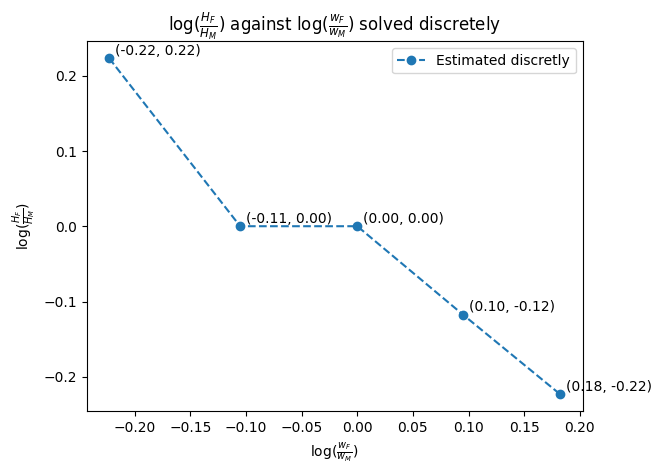

In [22]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0


#Solving discretely for HF/HM ratio and creating log wF/wM ratio
model.solve_wF_vec(discrete=True)

logHFHM_ratio = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot
plt.plot(logwFwM_ratio, logHFHM_ratio, 
         marker = 'o', 
         linestyle = '--', 
         label="Estimated discretly")

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " solved discretely")
plt.legend(loc='upper right')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio[i]:.2f})", (logwFwM_ratio[i]+0.005, logHFHM_ratio[i]+0.005))

#Show plot
plt.show()

------------
# <a id='toc5_'></a>[Question 3](#toc0_)

Explain your code and procedure

**Procedure**

1. We start by resettin alpha and sigma to the baseline value. 

2. Hereafter we use the solve_wF_vec method to solve the model for the given parameters.

3. Then we find the logHFHM_ratio_continuious, which is derived from the optimal model (model.opt.logHFHM)

4. The logFwM_ratio is then set equal to a log numpy array, for the values [0.8,0.9,1.0,1.1,1.2].

5. We can then plot the values with wages on the x-axis and logHFHM on the y-axis.

6. We then use the annotate method to annotate the datapoints.


**Output**

The output received from the code is a plot of the logHFHM ratio against the logFwM ratio. The plot is made by using the matplotlib.pyplot library. From the plot we can see that the logHFHM ratio is increasing with the logwFwM ration decreasing. This estimation is expected as the logHFHM ratio is the ratio of the household's utility from consumption and leisure, and the logFwM ratio is the ratio of the household's wage and the market's wage.

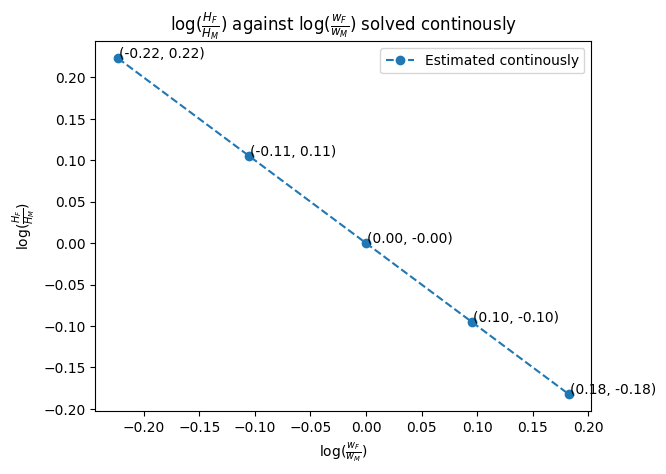

In [18]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Solving continously for HF/HM ratio and creating log of wFwM ratio
model.solve_wF_vec()

logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot

plt.plot(logwFwM_ratio, logHFHM_ratio_continous, 
         marker = 'o', 
         linestyle = '--', 
         label="Estimated continously")

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " solved continously")
plt.legend(loc='upper right')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_continous[i]:.2f})", (logwFwM_ratio[i]+0.001, logHFHM_ratio_continous[i]+0.0005))

#Show plot
plt.show()

---------
# <a id='toc6_'></a>[Question 4](#toc0_)

We start by estimating the model with the code in estimate model with scippy.optimize. Afterwards use the solution to continously solve for the optimum and then plot it against the estimated results from Siminski and Yetsenga (2022)


**Procedure**

1. We start by using the estimation method from the HouseholdMOD.py file.

2. We can then set sigma and alpha equal to the estimated values. 
    model.par.alpha = model.opt.alpha
    model.par.sigma = model.opt.sigma

3. We then use the solve_wF_vec method to solve the model for the given parameters.

4. We then generate the lines supplied from Siminski and Yetsenga (2022), by using the numpy.linspace method and the numpy.log method.

5. We then plot the results by using matplotlib.pyplot.

6. At last we annotate the datapoints by using the annotate method. 

**Output**

The output is a plot showing two graphs; Siminski and Yetsega and the estimated model. The estimated model is the blue line and the Siminski and Yetsega is the red line. The plot shows a deviation between the Siminski and Yetsega model and the estimated baseline model. We find the estimate

We find the values $\sigma$ and $\alpha$ to be a = 0.98 and 0.10 respectively, to minimize the function below: 
$$
\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2
$$

The estimated output is found to be a bit steeper, where as the Siminski Yetsega is flatter but with a higher intercept. A reason for this may be a different tolarance for risk. 





In [23]:
#Estimating alpha and sigma using the continously solved model
model.estimate()

#Settting alpha and sigma to the estimated values
model.par.alpha = model.opt.alpha
model.par.sigma = model.opt.sigma

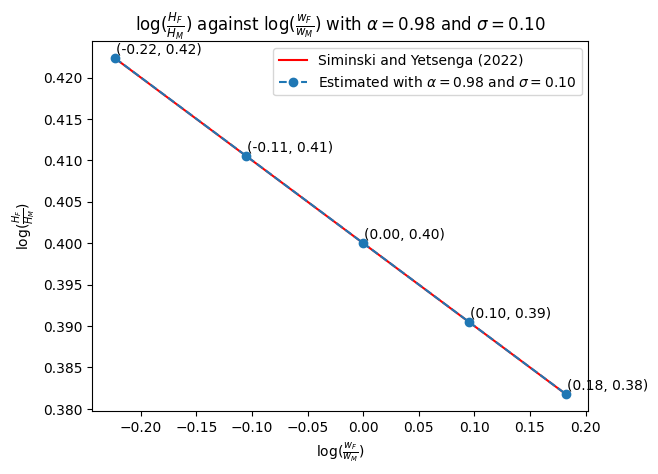

In [24]:
#Solving continously for HF/HM ratio and creating log of wFwM ratio
model.solve_wF_vec()

#Store results
logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Generating line by estimates from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

#Plot results in a plot
plt.plot(x, y, color = 'red', linestyle = '-', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_continous, 
         marker = 'o', 
         linestyle = '--', 
         label = 'Estimated with '+ r'$\alpha=$' f'{model.opt.alpha:.2f}'+ " and " + r'$\sigma=$' f'{model.opt.sigma:.2f}')

plt.legend(loc='upper right')

#Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " with " + r'$\alpha=$' f'{model.opt.alpha:.2f}'+ " and " + r'$\sigma=$' f'{model.opt.sigma:.2f}')

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_continous[i]:.2f})", (logwFwM_ratio[i]+0.001, logHFHM_ratio_continous[i]+0.0005))

#Show plot
plt.show()


---------------
# <a id='toc7_'></a>[Question 5](#toc0_)

The extension of the model we want to implement is...

**Procedure**

1. Update the __init__ method in HouseholdMOD.py to include the new parameter "$\kappa$".

    **Kappa**
        
        We include "Kappa" in our model to adjust for the preference ratio between man/woman for work. 

2. Furthermore we update the calc_utility method in HouseholdMOD.py to include the new parameter "$\kappa$".

3. We then assume an alpha value of 0.5 as mentioned in the assignment. 

4. All three models are then solved. 

5. We then plot the results by using matplotlib.pyplot.


**Output**

The plot shows the three models. The blue line is the baseline model, the red line is the Siminski Yetsanga model, the orange line is the extended model with $\kappa$ = 1.5. We find a small shift in the extended model, where the intercept is now higher relative to the baseline model. This is expected as the new model adresses the preferenece for work. 

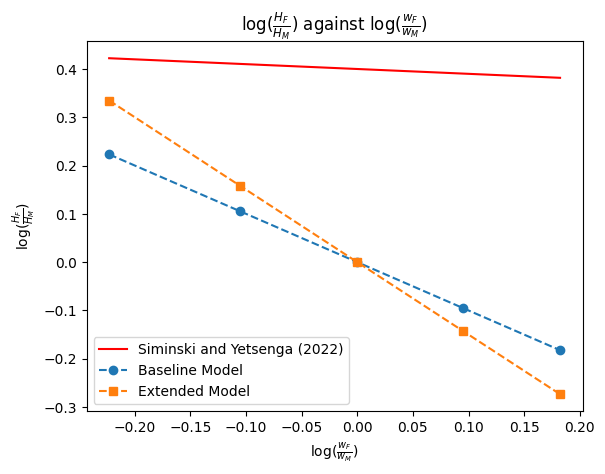

In [25]:
from HouseholdMOD import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create instances of the original and extended models
original_model = HouseholdSpecializationModelClass()
extended_model = HouseholdSpecializationModelClass()

# Modify the kappa parameter in the extended model
extended_model.par.kappa = 1.5 # Adjust the value to analyze the effects of different kappa values

# Solve both models for different wF
original_model.solve_wF_vec()
extended_model.solve_wF_vec()


# Create a model instance
model = HouseholdSpecializationModelClass()

# Estimate the model
model.estimate()

# Solve the model for different wF
model.solve_wF_vec()

# Store results
logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Generate line by estimates from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

# Solving continuously for HF/HM ratio and creating log of wFwM ratio for the baseline model
model.par.alpha = 0.5
model.par.sigma = 1.0
model.solve_wF_vec()
logHFHM_ratio_baseline = model.opt.logHFHM

# Generating line by estimates from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 2))
y = model.par.beta0_target + model.par.beta1_target*x

# Solving continuously for HF/HM ratio for the extended model
model.par.alpha = 0.5
model.par.sigma = 1.5
model.solve_wF_vec()
logHFHM_ratio_extended = model.opt.logHFHM

# Plot results in a plot
plt.plot(x, y, color='red', linestyle='-', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_baseline, 
         marker='o', 
         linestyle='--', 
         label="Baseline Model")
plt.plot(logwFwM_ratio, logHFHM_ratio_extended, 
         marker='s', 
         linestyle='--', 
         label="Extended Model")

plt.legend(loc='lower left')

# Set title
plt.title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')

# Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

# Show plot
plt.show()
